In [99]:
#import dependencies
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#set display options
pd.set_option ('display.max_rows', 30)

In [100]:
#programming plan:
#decide which columns to get dummies for and which to drop
#apply get dummies
#scale the data
#reduce dimensions with PCA
#find k value with elbow curve
#run k-means
#consider hierarchical clustering also


In [101]:
#Set path of input file
file_path = "Resources/US_Salary_Cleaned.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [102]:
salaries_df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue            float64
bonus                      float64
gender                      object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
city                        object
state                       object
country                     object
dtype: object

In [103]:
#check value counts for cities
salaries_df['city'].value_counts()

Seattle            6945
San Francisco      5146
New York           3798
Redmond            2455
Sunnyvale          1823
                   ... 
West Palm Beach       1
Kalamazoo             1
Inwood                1
Butte                 1
Hilbert               1
Name: city, Length: 642, dtype: int64

In [104]:
#check value counts for states

salaries_df['state'].value_counts()

CA    18260
WA    10291
NY     3947
TX     2570
MA     1598
      ...  
ND        5
ME        4
HI        4
MS        3
WY        1
Name: state, Length: 49, dtype: int64

In [105]:
# Use get_dummies() to create variables for text features.
salaries_binary = pd.get_dummies(salaries_df, columns=["gender","city",'state','company','title'])
salaries_binary

,timestamp,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,...,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
0,2017-06-07 11:33:00,127000,1.5,1.5,107000,20000.0,10000.0,7392,807.0,1,...,0,0,0,1,0,0,0,0,0,0
1,2017-06-10 17:11:00,100000,5.0,3.0,100000,0.0,0.0,7419,807.0,2,...,0,0,0,0,0,0,1,0,0,0
2,2017-06-11 14:53:00,310000,8.0,0.0,155000,0.0,0.0,11527,819.0,3,...,0,0,0,1,0,0,0,0,0,0
3,2017-06-20 10:58:00,157000,5.0,3.0,157000,0.0,0.0,7322,807.0,9,...,0,0,0,0,0,0,1,0,0,0
4,2017-06-21 17:27:00,208000,8.5,8.5,208000,0.0,0.0,11527,819.0,11,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,327000,10.0,1.0,155000,150000.0,22000.0,11527,819.0,1973,...,0,0,0,0,0,0,1,0,0,0
44719,2018-09-13 08:23:00,237000,2.0,2.0,146900,73200.0,16000.0,11521,819.0,2037,...,0,0,0,0,0,0,1,0,0,0
44720,2018-09-13 14:35:00,220000,14.0,12.0,157000,25000.0,20000.0,11527,819.0,2044,...,0,0,0,0,0,0,1,0,0,0
44721,2018-09-16 16:10:00,280000,8.0,4.0,194688,57000.0,29000.0,7419,807.0,2097,...,0,0,0,0,0,0,1,0,0,0


In [106]:
#drop timestamp and country
salaries_binary.drop(columns=['timestamp','country'],inplace=True)
salaries_binary

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,...,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
0,127000,1.5,1.5,107000,20000.0,10000.0,7392,807.0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,100000,5.0,3.0,100000,0.0,0.0,7419,807.0,2,0,...,0,0,0,0,0,0,1,0,0,0
2,310000,8.0,0.0,155000,0.0,0.0,11527,819.0,3,0,...,0,0,0,1,0,0,0,0,0,0
3,157000,5.0,3.0,157000,0.0,0.0,7322,807.0,9,0,...,0,0,0,0,0,0,1,0,0,0
4,208000,8.5,8.5,208000,0.0,0.0,11527,819.0,11,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,327000,10.0,1.0,155000,150000.0,22000.0,11527,819.0,1973,0,...,0,0,0,0,0,0,1,0,0,0
44719,237000,2.0,2.0,146900,73200.0,16000.0,11521,819.0,2037,0,...,0,0,0,0,0,0,1,0,0,0
44720,220000,14.0,12.0,157000,25000.0,20000.0,11527,819.0,2044,0,...,0,0,0,0,0,0,1,0,0,0
44721,280000,8.0,4.0,194688,57000.0,29000.0,7419,807.0,2097,0,...,0,0,0,0,0,0,1,0,0,0


In [107]:
# Standardize the data with StandardScaler().
salaries_scaled = StandardScaler().fit_transform(salaries_binary)
salaries_scaled

array([[-0.98206737, -0.88988181, -0.34252429, ..., -0.18985798,
        -0.12881595, -0.15790539],
       [-1.36910196, -0.25586324,  0.12738109, ..., -0.18985798,
        -0.12881595, -0.15790539],
       [ 1.64116705,  0.28758124, -0.81242967, ..., -0.18985798,
        -0.12881595, -0.15790539],
       ...,
       [ 0.35105176,  1.37447021,  2.94681339, ..., -0.18985798,
        -0.12881595, -0.15790539],
       [ 1.21112862,  0.28758124,  0.44065135, ..., -0.18985798,
        -0.12881595, -0.15790539],
       [ 0.06435948, -1.16160405, -0.81242967, ..., -0.18985798,
        -0.12881595, -0.15790539]])

In [108]:
#Figure out how many components you want to reduce to for PCA
#Following methodology described at this url
#https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(salaries_binary)

In [109]:
#set threshold to 95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

TypeError: 'tuple' object is not callable

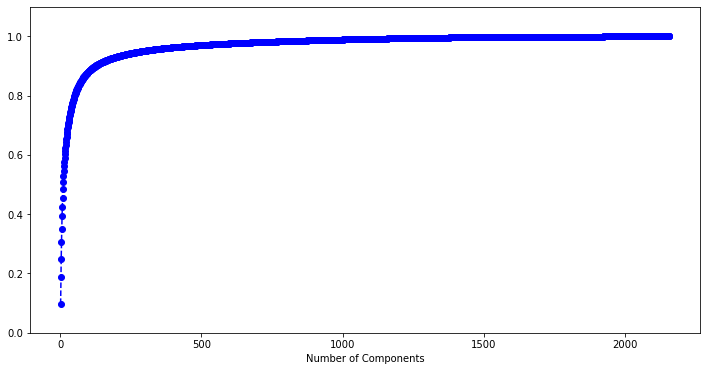

In [110]:
pca = PCA().fit(data_rescaled)


import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 2159, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 2159, step=50),rotation=90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components = 250)
salaries_pca = pca.fit_transform(salaries_scaled)
salaries_pca

In [ ]:
# Create a DataFrame with the principal components.
pcs_df = pd.DataFrame(salaries_pca)
pcs_df.head(10)

In [47]:
# Create an elbow curve to find the best value for K.
#Find the best value for K
#Don't run every inertia at first, will take too long
inertia = []
k = list(range(1,5))

#calculate the inertia for the range of K values, every 400 from 1-2000 clusters
for i in k:
    if i ==1:
        km=KMeans(n_clusters = i)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
    else:
        km=KMeans(n_clusters = (i-1)*400)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
        
    
#Create the elbow curve
elbow_data = {"k":k,"inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k",y="inertia",xticks=k,title="Elbow Curve")
#cell takes about 11 minutes to execute on my laptop

:Curve   [k]   (inertia)

In [59]:
#now calculate inertias for every 200 from 1 to 1000
inertia = []
k = list(range(1,6))

#calculate the inertia for the range of K values
for i in k:
    if i ==1:
        km=KMeans(n_clusters = i)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
    else:
        km=KMeans(n_clusters = (i-1)*200)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
        
    
#Create the elbow curve
elbow_data = {"k":k,"inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k",y="inertia",xticks=k,title="Elbow Curve")

:Curve   [k]   (inertia)

In [44]:
#now calculate inertias for every 100 from 1 to 300
inertia = []
k = list(range(1,5))

#calculate the inertia for the range of K values
for i in k:
    if i ==1:
        km=KMeans(n_clusters = i)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
    else:
        km=KMeans(n_clusters = (i-1)*100)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
        
    
#Create the elbow curve
elbow_data = {"k":k,"inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k",y="inertia",xticks=k,title="Elbow Curve")

:Curve   [k]   (inertia)

In [61]:
#now every 25 from 1-150

inertia = []
k = list(range(1,7))

#calculate the inertia for the range of K values
for i in k:
    if i ==1:
        km=KMeans(n_clusters = 1)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
    else:
        km=KMeans(n_clusters = (i-1)*25)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
        
    
#Create the elbow curve
elbow_data = {"k":k,"inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k",y="inertia",xticks=k,title="Elbow Curve")

:Curve   [k]   (inertia)

In [58]:
#now every 20 from 1-300
inertia = []
k = list(range(1,16))

#calculate the inertia for the range of K values
for i in k:
    if i ==1:
        km=KMeans(n_clusters = 1)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
    else:
        km=KMeans(n_clusters = (i-1)*20)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
        
    
#Create the elbow curve
elbow_data = {"k":k,"inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow.hvplot.line(x="k",y="inertia",xticks=k,title="Elbow Curve")

:Curve   [k]   (inertia)

In [63]:
#now every 75 from 1-450
inertia = []
k = list(range(1,7))

#calculate the inertia for the range of K values
for i in k:
    if i ==1:
        km=KMeans(n_clusters = 1)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
    else:
        km=KMeans(n_clusters = (i-1)*75)
        km.fit(pcs_df)
        inertia.append(km.inertia_)
        
    
#Create the elbow curve
elbow_data = {"k":k,"inertia":inertia}
df_elbow = pd.DataFrame(elbow_data)

df_elbow.hvplot.line(x="k",y="inertia",xticks=k,title="Elbow Curve")

#Somewhere around 200-225

:Curve   [k]   (inertia)

In [79]:
# Initialize the K-Means model with k=30.
model = KMeans(n_clusters = 30)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions
#fit the model

KeyboardInterrupt: 

In [64]:
# Initialize the K-Means model with k=200.
model = KMeans(n_clusters = 200)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions
#fit the model

array([  1,   4, 159, ..., 159, 151,  87])

In [66]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([salaries_df, pcs_df],axis=1)
clustered_df

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_


# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)


(44723, 277)


,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,241,242,243,244,245,246,247,248,249,Class
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,-0.236722,-0.208360,0.844850,-0.155835,-0.152459,0.120278,0.073785,-0.090763,0.336397,1
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,-0.269135,-0.139907,-0.082436,0.035737,-0.298232,-0.270144,-0.179015,-0.335710,-0.140766,4
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,-0.099009,0.129755,0.161744,-0.059419,0.011881,0.225683,0.058922,0.006723,0.176674,159
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0.087740,-0.133067,0.052945,0.018528,0.076621,0.044901,-0.046859,0.006035,-0.060292,97
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0.027022,-0.012565,-0.048754,0.054885,0.019877,-0.082563,-0.048328,-0.028992,-0.060890,159
5,2017-06-22 12:37:00,Microsoft,Software Engineering Manager,300000,15.0,11.0,180000,65000.0,55000.0,none,...,0.005401,0.058194,-0.064735,-0.072382,0.006054,-0.015381,-0.098564,-0.157915,-0.025892,7
6,2017-06-22 13:55:00,Microsoft,Software Engineer,156000,4.0,4.0,135000,8000.0,13000.0,none,...,0.008157,-0.027778,0.003045,0.032097,0.006965,-0.074574,-0.046004,-0.004310,0.007381,159
7,2017-06-22 23:08:00,Microsoft,Software Engineer,120000,3.0,1.0,120000,0.0,0.0,none,...,0.047471,-0.159877,0.036081,0.037379,0.044541,0.015278,-0.059394,0.055681,-0.080100,7
8,2017-06-26 21:25:00,Microsoft,Software Engineer,201000,12.0,6.0,157000,26000.0,28000.0,none,...,0.004526,-0.007748,0.006864,0.072285,-0.008361,-0.105117,-0.077305,-0.011818,0.012063,159
9,2017-06-30 16:29:00,Salesforce,Software Engineering Manager,450000,16.0,3.0,230000,100000.0,45000.0,none,...,-0.248651,0.481628,-0.208527,-0.019136,-0.278449,0.075641,0.029263,0.205837,0.327362,151


In [78]:

cluster_counts = clustered_df['Class'].value_counts()
cluster_counts

151    6088
159    4322
43     3676
7      2578
97     2503
24     2479
133    1923
4      1772
12     1374
87     1312
64     1194
0      1001
99      920
115     868
166     770
132     669
40      594
28      546
9       526
70      521
29      510
58      465
13      417
1       417
150     350
88      302
83      289
128     248
77      248
26      226
39      217
164     209
199     202
79      198
114     197
121     164
8       152
27      152
165     139
153     139
73      138
68      133
78      131
17      124
111     121
14      118
145     112
189     111
18      101
140      95
22       85
69       81
74       80
34       79
59       76
45       74
152      74
191      70
188      64
47       64
20       62
89       62
192      58
173      57
180      56
104      52
127      50
177      47
193      46
135      45
19       42
93       42
129      41
182      39
41       37
163      32
108      32
183      32
197      31
11       30
62       30
134      29
100      29
198 

<AxesSubplot:ylabel='Density'>

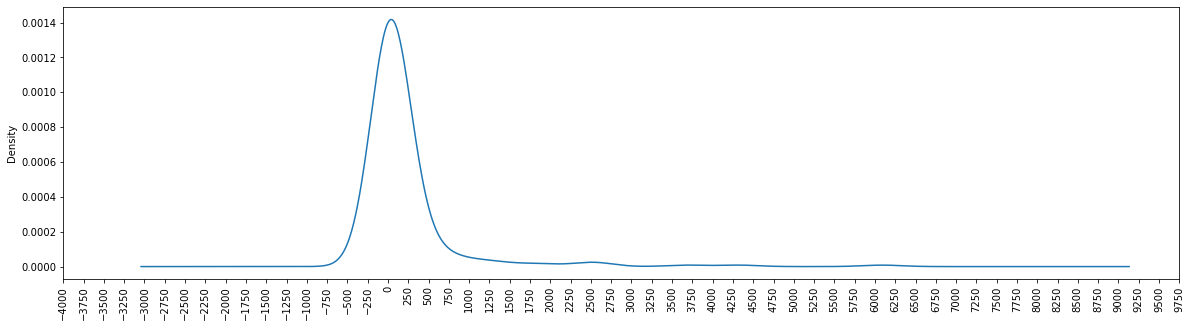

In [77]:
#Visualize the title value counts with a density plot
x_ticks = np.arange(-4000,10000,250)
cluster_counts.plot.density(xticks=x_ticks, figsize = (20,5),rot = 90)

In [73]:
clustered_df.columns.tolist()

['timestamp',
 'company',
 'title',
 'totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'basesalary',
 'stockgrantvalue',
 'bonus',
 'gender',
 'cityid',
 'dmaid',
 'rowNumber',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'city',
 'state',
 'country',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117